In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
input_img = cv.imread('im_contrast_3.jpg')
img = input_img[:,:,::-1]

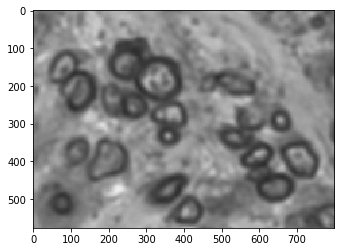

In [3]:
plt.imshow(input_img)

In [4]:
l = np.max(img)
c = 255/(np.log(1 + l))
io = c*np.log(1 + img)

$$s = T(r) = clog(r+1)$$

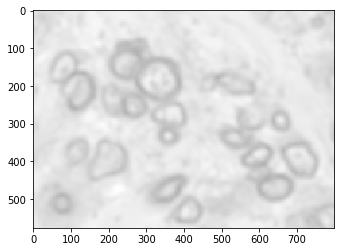

In [5]:
# Apply log transform
img_log = (np.log(img+1)/(np.log(1+np.max(img))))*255
# Specify the data type
img_log = np.array(img_log,dtype=np.uint8)
plt.imshow(img_log)

In [6]:
# Ensanchamiento de contraste
A = 0
B = 0
m = 150
E = 3
r = np.arange(0,255,1)
s = 1/(1 + (m/r)**E)

/home/cyborx/anaconda3/envs/pyimg/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  


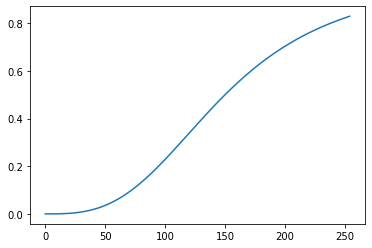

In [7]:
plt.plot(r, s)
plt.show()

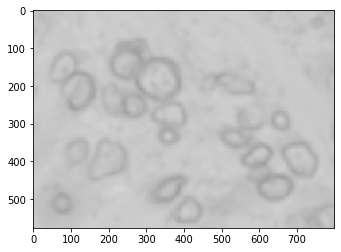

In [8]:
s2 = 1/(1 + (m/img_log)**E)
plt.imshow(s2)

255


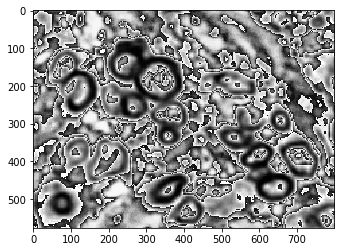

In [9]:
# Ecualización del histograma

[nk, k] = np.histogram(img_log.flatten(),256,[0,256])
height, width = img_log.shape[:2]

nk = nk/(height* width)
L = np.max(img_log)
Tnk = np.zeros(L)
sum_ = 0
for i in range(0, L):
    sum_ += nk[i]
    Tnk[i] = np.floor((L-1)*sum_)
print(np.max(img_log))


Iout4 = Tnk[img_log-1]
Iout4 = np.array(Iout4, dtype=np.uint8)
plt.imshow(Iout4)